In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("/Users/mrityunjay/Desktop/My-Internship/Cognifyz/Data-Analysis/Dataset .csv")

In [3]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
dataset.shape

(9551, 21)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
dataset['Cuisines'].fillna(dataset['Cuisines'].mode()[0], inplace = True)

In [8]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
categorical_column = dataset.select_dtypes(include=['object']).columns
numerical_column = dataset.select_dtypes(exclude=['object']).columns

In [10]:
print(categorical_column)

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [11]:
print(numerical_column)

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


## Level 1

### Task 1: Top Cuisines

In [14]:
dataset['Cuisines'].value_counts()

Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [15]:
Top_3_Cuisines = dataset['Cuisines'].value_counts().head(3)
Top_3_Cuisines

Cuisines
North Indian             945
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

In [16]:
print('The top 3 Cuisines are : ')
for i in range(len(Top_3_Cuisines.index)):
    print(Top_3_Cuisines.index[i])

The top 3 Cuisines are : 
North Indian
North Indian, Chinese
Chinese


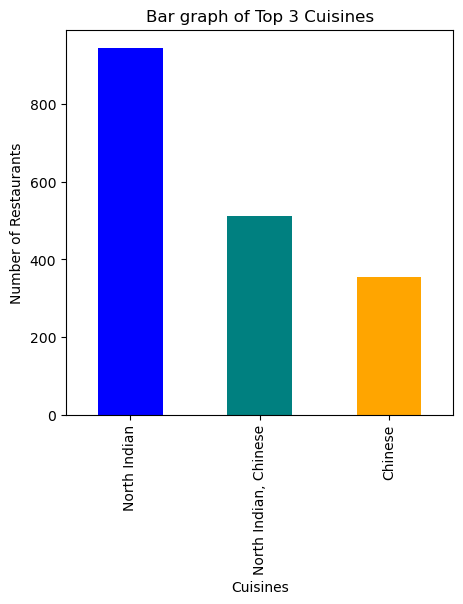

In [17]:
#plotting of top 3 Cuisines
plt.figure(figsize = (5,5))
colors = ['blue', 'teal', 'orange']
Top_3_Cuisines.plot(kind = 'bar', color = colors)
plt.title("Bar graph of Top 3 Cuisines")
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.show()

In [18]:
percent = (Top_3_Cuisines/len(dataset)) * 100

In [19]:
per_dict = dict(zip(Top_3_Cuisines.index, percent))
per_dict

{'North Indian': 9.894251910794681,
 'North Indian, Chinese': 5.350225107318606,
 'Chinese': 3.706418176107214}

In [20]:
df = pd.DataFrame(per_dict.items(), columns = ['Cuisines', 'Percentage'])
df

,Cuisines,Percentage
0,North Indian,9.894252
1,"North Indian, Chinese",5.350225
2,Chinese,3.706418


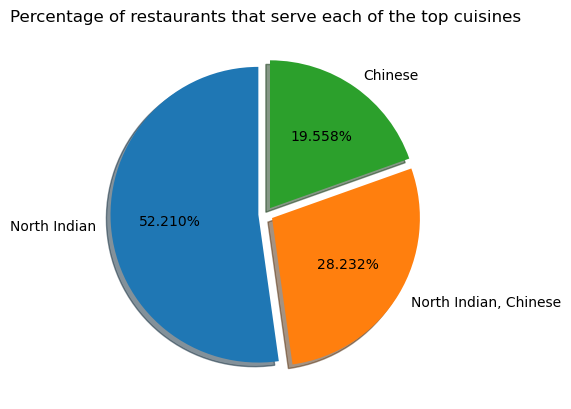

In [21]:
plt.title('Percentage of restaurants that serve each of the top cuisines')
plt.pie(df['Percentage'], labels = df['Cuisines'], autopct = '%0.3f%%', explode = [0.05,0.05,0.05], startangle = 90, shadow = True)
plt.show() 

### Task 2 : City Analysis

In [23]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
# city which have higher Restaurants

In [25]:
high_city = dataset['City'].value_counts().head(1)
high_city

City
New Delhi    5473
Name: count, dtype: int64

In [26]:
high_city.index[0]

'New Delhi'

In [27]:
#Calculate the average rating for restaurants in each city.

In [28]:
mean = dataset['Aggregate rating'].mean()
mean

2.66637001361114

In [29]:
Average_Rating = dataset.groupby(['City', 'Restaurant Name'])['Aggregate rating'].mean().reset_index()
Average_Rating

,City,Restaurant Name,Aggregate rating
0,Abu Dhabi,Applebee's,4.0
1,Abu Dhabi,Bait El Khetyar,4.0
2,Abu Dhabi,Cho Gao - Crowne Plaza Abu Dhabi,4.4
3,Abu Dhabi,Denny's,4.6
4,Abu Dhabi,Famous Dave's Barbecue,4.6
...,...,...,...
7969,��stanbul,Leman K�_lt�_r,3.7
7970,��stanbul,Naml۱ Gurme,4.1
7971,��stanbul,Starbucks,4.9
7972,��stanbul,Valonia,4.2


In [30]:
Average_Ratings = dataset.groupby('City')['Aggregate rating'].mean().reset_index()
Average_Ratings

,City,Aggregate rating
0,Abu Dhabi,4.300000
1,Agra,3.965000
2,Ahmedabad,4.161905
3,Albany,3.555000
4,Allahabad,3.395000
...,...,...
136,Weirton,3.900000
137,Wellington City,4.250000
138,Winchester Bay,3.200000
139,Yorkton,3.300000


In [31]:
# Determine the city with the highest average rating.

In [32]:
Average_Ratings = dataset.groupby('City')['Aggregate rating'].mean().reset_index()

In [33]:
Average_Ratings_City = Average_Ratings.sort_values(by = 'Aggregate rating', ascending = False)
Average_Ratings_City

,City,Aggregate rating
56,Inner City,4.900000
107,Quezon City,4.800000
73,Makati City,4.650000
95,Pasig City,4.633333
75,Mandaluyong City,4.625000
...,...,...
88,New Delhi,2.438845
83,Montville,2.400000
78,Mc Millan,2.400000
89,Noida,2.036204


In [34]:
Average_Ratings_City.iloc[0, 0]

'Inner City'

### Task 3 : Price Range Distribution

In [36]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [37]:
# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [38]:
Price_ranges = dataset['Price range'].value_counts()
Price_ranges

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

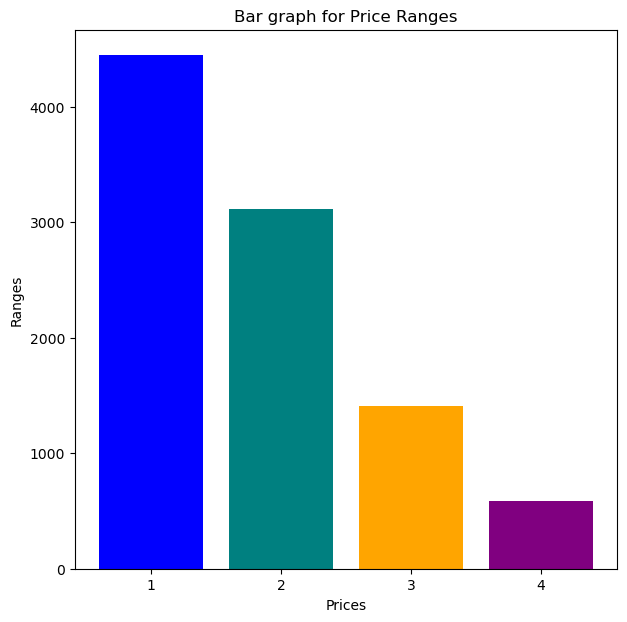

In [39]:
plt.figure(figsize = (7, 7))
colors = ['blue', 'teal', 'orange', 'purple']
plt.bar(['1', '2', '3', '4'], list(Price_ranges.values), color = colors)
plt.title("Bar graph for Price Ranges")
plt.xlabel('Prices')
plt.ylabel('Ranges')
plt.show()

In [40]:
# Calculate the percentage of restaurants in each price range category.

In [41]:
percent = (Price_ranges / len(dataset)) * 100
percent

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

In [42]:
percent_dict = dict(zip(percent.index, percent))
percent_dict

{1: 46.52915925034028,
 2: 32.59344571249084,
 3: 14.741911841691968,
 4: 6.135483195476914}

In [43]:
percent_df = pd.DataFrame(percent_dict.items(), columns = ['Price', 'Percentage'])
percent_df

,Price,Percentage
0,1,46.529159
1,2,32.593446
2,3,14.741912
3,4,6.135483


In [44]:
colors = ['purple', 'orange', 'green', 'red']

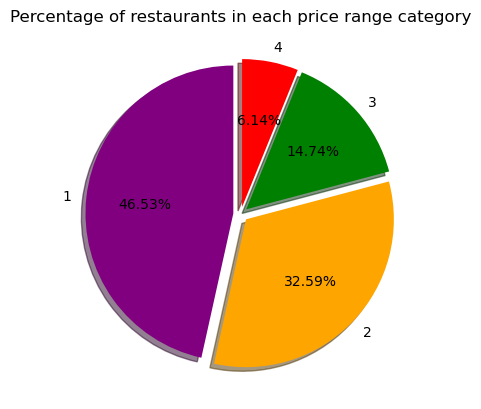

In [45]:
plt.title('Percentage of restaurants in each price range category')
plt.pie(percent_df['Percentage'], labels = percent_df['Price'], autopct = '%0.2f%%', colors = colors, explode = [0.05, 0.05, 0.05, 0.05] ,startangle = 90, shadow = True)
plt.show() 

### Task 4 : Online Delivery

In [47]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [48]:
# Determine the percentage of restaurants that offer online delivery.

In [49]:
offer_online = dataset[dataset['Has Online delivery' ] == 'Yes']['Restaurant Name'].value_counts()
offer_online

Restaurant Name
Subway                47
McDonald's            30
Pizza Hut Delivery    18
Chaayos               15
KFC                   15
                      ..
Al Zaitoon             1
The Barley House       1
Bemisaal               1
Urban Kabab            1
Saffron Mantra         1
Name: count, Length: 1728, dtype: int64

In [50]:
rest_offer_online = len(dataset[dataset['Has Online delivery' ] == 'Yes'])
rest_offer_online

2451

In [51]:
round(dataset[dataset['Has Online delivery'] == 'Yes']['Restaurant Name'].value_counts() / rest_offer_online * 100, 2)

Restaurant Name
Subway                1.92
McDonald's            1.22
Pizza Hut Delivery    0.73
Chaayos               0.61
KFC                   0.61
                      ... 
Al Zaitoon            0.04
The Barley House      0.04
Bemisaal              0.04
Urban Kabab           0.04
Saffron Mantra        0.04
Name: count, Length: 1728, dtype: float64

In [52]:
percentage = (rest_offer_online / len(dataset)) * 100
percentage

25.662234321013504

In [53]:
print(f"Percentage of restaurants that offer online delivery is {percentage} %")

Percentage of restaurants that offer online delivery is 25.662234321013504 %


In [54]:
# Compare the average ratings of restaurants with and without online delivery.

In [55]:
online_offer_resto = dataset[dataset['Has Online delivery'] == 'Yes']
offline_offer_resto = dataset[dataset['Has Online delivery'] == 'No']

In [56]:
Average_ratings= online_offer_resto.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index()
Average_ratings

,Restaurant Name,Aggregate rating
0,#OFF Campus,3.70
1,#Urban Caf��,3.30
2,18 Degrees Resto Lounge,3.60
3,19 Flavours Biryani,4.10
4,2 Bros Kitchen,3.20
...,...,...
1723,Zucca Pizzeria,3.50
1724,bu��no,3.75
1725,hug!,3.50
1726,iGNiTE,3.00


In [57]:
Average_ratings= offline_offer_resto.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index()
Average_ratings

,Restaurant Name,Aggregate rating
0,#45,3.6
1,#Dilliwaala6,3.7
2,#InstaFreeze,0.0
3,#hashtag,0.0
4,'Ohana,4.5
...,...,...
5926,t Lounge by Dilmah,3.6
5927,tashas,4.1
5928,wagamama,3.7
5929,{Niche} - Cafe & Bar,4.1


In [58]:
dataset.groupby('Has Online delivery')['Aggregate rating'].mean().round(2).reset_index()

,Has Online delivery,Aggregate rating
0,No,2.47
1,Yes,3.25
